In [106]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import cv2

In [107]:
path= "C:/Users/chlpp/OneDrive - McGill University/Desktop/ECSE 415/"
pic1 = 'first.jpg'
pic2 = 'second.jpg'

### 1. Image Acquisition

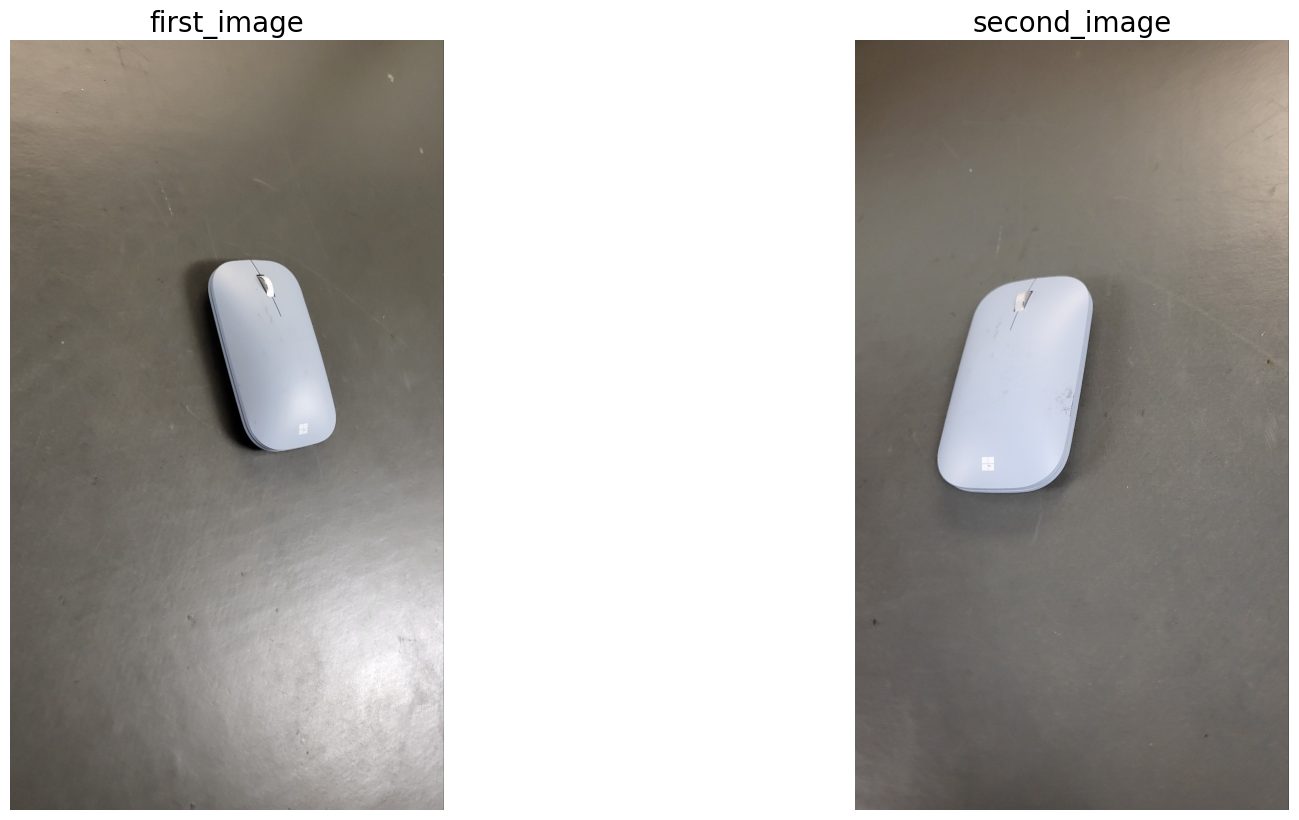

In [108]:
first_image = cv2.imread(path + pic1) #numpy arrays that contains BGR values of pixels 
second_image = cv2.imread(path + pic2)


first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2RGB) #convert BGR to RGB  
second_image = cv2.cvtColor(second_image, cv2.COLOR_BGR2RGB) # ex) first_image[0][0] => tuple(R,G,B)

plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(first_image)
plt.title("first_image",fontsize=20), plt.axis("off")
plt.subplot(122), plt.imshow(second_image)
plt.title("second_image",fontsize=20), plt.axis("off")
plt.show()

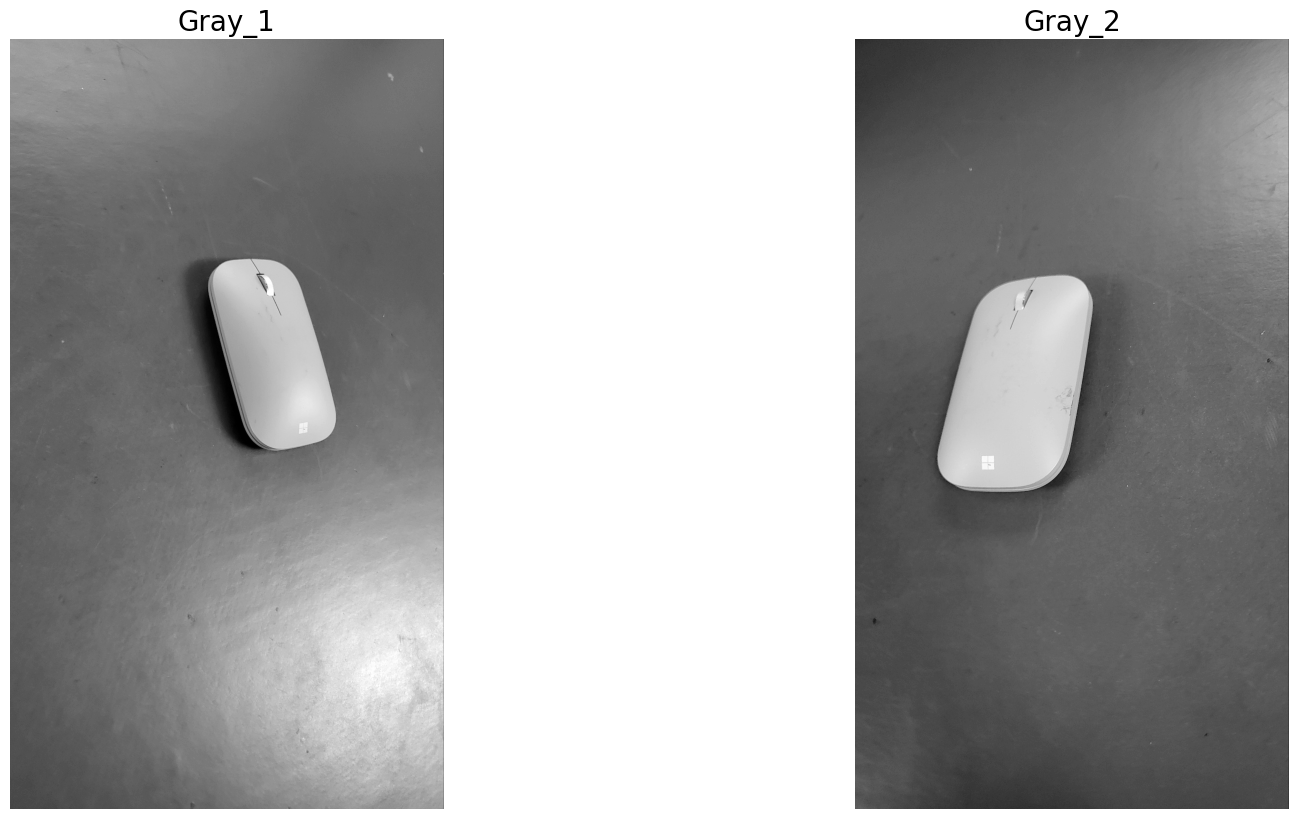

In [109]:

#find the average values of each pixel's R,G,B values
gray_first_image = cv2.cvtColor(first_image, cv2.COLOR_RGB2GRAY)  
gray_second_image = cv2.cvtColor(second_image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(gray_first_image , cmap='gray')
plt.title("Gray_1",fontsize=20)
plt.axis("off")
plt.subplot(122), plt.imshow(gray_second_image, cmap='gray')
plt.title("Gray_2",fontsize=20)
plt.axis("off")
plt.show()

### 2. Create Gaussian Pyramids

In [110]:
def get_gauss__kernel(size,std):
    # initialize size x size matrix and offset
    GaussKernel = np.zeros((size,size))
    offset = size // 2
    # Gaussian Function in 2D
    e = lambda x: np.exp(x)
    power = lambda x, y: (x**2+y**2)/ (2*std**2)
    G_sig = lambda x, y : (1 / (2 * math.pi * (std)**2)) * e(-power(x,y))
    

    for i in range(size):
        y = offset - i
        for j in range(size):
            x = offset - j
            GaussKernel[i][j] = G_sig(y,x)
    return np.array(GaussKernel, dtype=np.float32)


GaussKernel_5x5 = get_gauss__kernel(size=5, std=2)
GaussKernel_11x11 = get_gauss__kernel(size=11, std=4) 
GaussKernel_23x23 = get_gauss__kernel(size=23, std=8)
GaussKernel_47x47 = get_gauss__kernel(size=47, std=16)
GaussKernel_95x95 = get_gauss__kernel(size=95, std=32)
# implementing 5x5 pixel Gaussian Kernel using OpenCV 
Filtered1_5x5= cv2.filter2D(gray_first_image,-1,GaussKernel_5x5)
Filtered2_5x5 = cv2.filter2D(gray_second_image,-1,GaussKernel_5x5)

# implementing 11x11 pixel Gaussian Kernel using OpenCV 
Filtered1_11x11 = cv2.filter2D(gray_first_image,-1,GaussKernel_11x11)
Filtered2_11x11 = cv2.filter2D(gray_second_image,-1,GaussKernel_11x11)

# implementing 23x23 pixel Gaussian Kernel using OpenCV 
Filtered1_23x23= cv2.filter2D(gray_first_image,-1,GaussKernel_23x23)
Filtered2_23x23 = cv2.filter2D(gray_second_image,-1,GaussKernel_23x23)

# implementing 47x47 pixel Gaussian Kernel using OpenCV 
Filtered1_47x47 = cv2.filter2D(gray_first_image,-1,GaussKernel_47x47)
Filtered2_47x47 = cv2.filter2D(gray_second_image,-1,GaussKernel_47x47)

# implementing 95x95 pixel Gaussian Kernel using OpenCV 
Filtered1_95x95 = cv2.filter2D(gray_first_image,-1,GaussKernel_95x95)
Filtered2_95x95 = cv2.filter2D(gray_second_image,-1,GaussKernel_95x95)

GaussPyramids1 = [Filtered1_5x5,Filtered1_11x11,Filtered1_23x23,Filtered1_47x47,Filtered1_95x95]
GaussPyramids2 = [Filtered2_5x5,Filtered2_11x11,Filtered2_23x23,Filtered2_47x47,Filtered2_95x95]

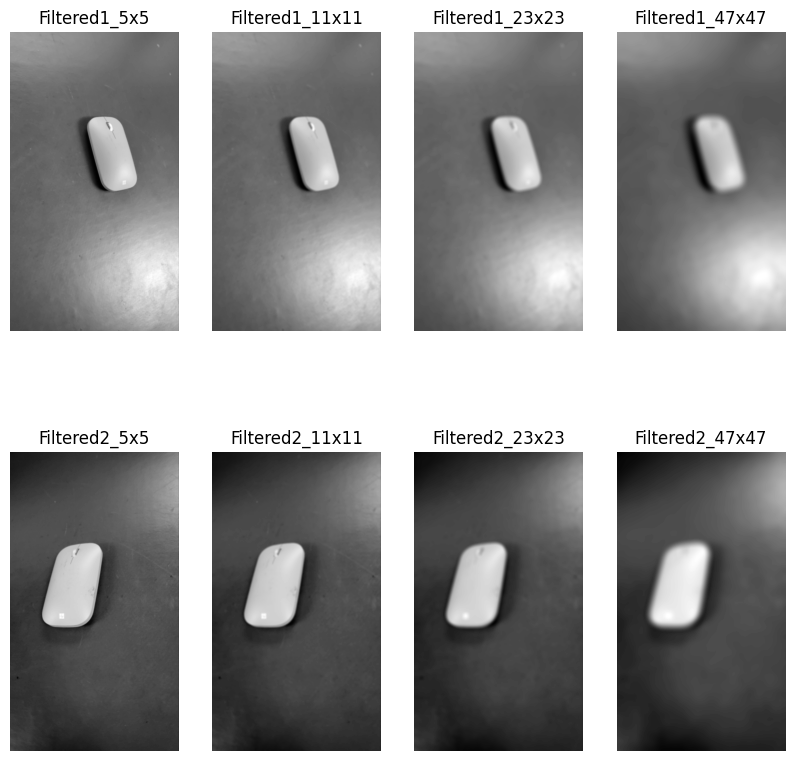

In [111]:

fig, axes = plt.subplots(2,4,figsize=(10,10))
axes[0,0].imshow(GaussPyramids1[0], cmap='gray'),axes[0,0].axis('off')
axes[0,0].set_title("Filtered1_5x5")
axes[0,1].imshow(GaussPyramids1[1], cmap='gray'),axes[0,1].axis('off')
axes[0,1].set_title("Filtered1_11x11")
axes[0,2].imshow(GaussPyramids1[2], cmap='gray'),axes[0,2].axis('off')
axes[0,2].set_title("Filtered1_23x23")
axes[0,3].imshow(GaussPyramids1[3], cmap='gray'),axes[0,3].axis('off')
axes[0,3].set_title("Filtered1_47x47")
axes[1,0].imshow(GaussPyramids2[0], cmap='gray'),axes[1,0].axis('off')
axes[1,0].set_title("Filtered2_5x5")
axes[1,1].imshow(GaussPyramids2[1], cmap='gray'),axes[1,1].axis('off')
axes[1,1].set_title("Filtered2_11x11")
axes[1,2].imshow(GaussPyramids2[2], cmap='gray'),axes[1,2].axis('off')
axes[1,2].set_title("Filtered2_23x23")
axes[1,3].imshow(GaussPyramids2[3], cmap='gray'),axes[1,3].axis('off')
axes[1,3].set_title("Filtered2_47x47")
plt.show()

### 3. Create Laplacian Pyramids Using DoG


In [112]:
DoG1 = []
DoG2 = []
for i in range(4):
    laplacian_layer = cv2.subtract(GaussPyramids1[i],GaussPyramids1[i+1])
    DoG1.append(laplacian_layer)
    laplacian_layer = cv2.subtract(GaussPyramids2[i],GaussPyramids2[i+1])
    DoG2.append(laplacian_layer)



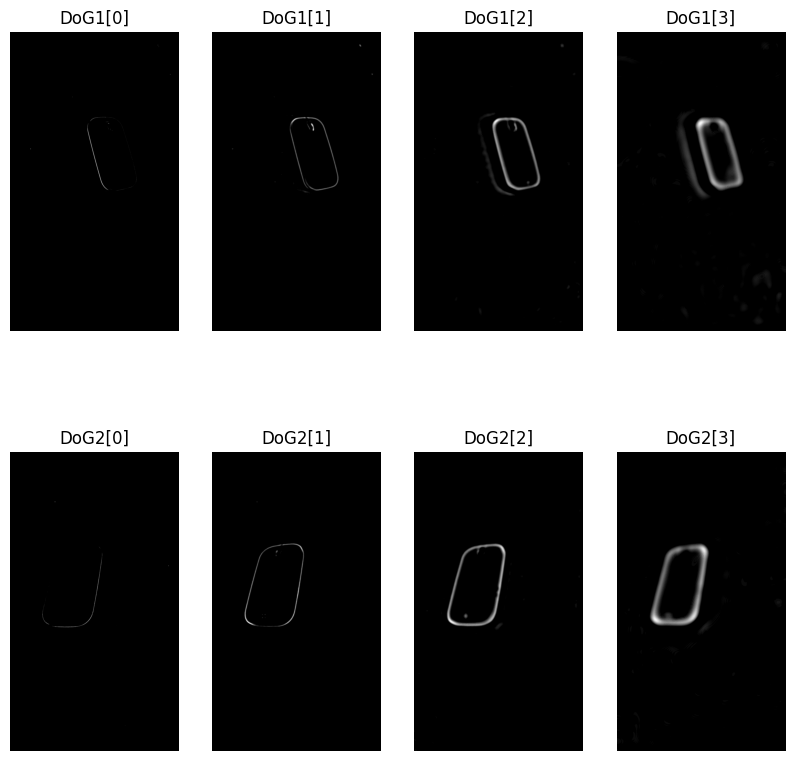

In [113]:

fig, axes = plt.subplots(2,4,figsize=(10,10))
axes[0,0].imshow(DoG1[0], cmap='gray'),axes[0,0].axis('off')
axes[0,0].set_title("DoG1[0]")
axes[0,1].imshow(DoG1[1], cmap='gray'),axes[0,1].axis('off')
axes[0,1].set_title("DoG1[1]")
axes[0,2].imshow(DoG1[2], cmap='gray'),axes[0,2].axis('off')
axes[0,2].set_title("DoG1[2]")
axes[0,3].imshow(DoG1[3], cmap='gray'),axes[0,3].axis('off')
axes[0,3].set_title("DoG1[3]")
axes[1,0].imshow(DoG2[0], cmap='gray'),axes[1,0].axis('off')
axes[1,0].set_title("DoG2[0]")
axes[1,1].imshow(DoG2[1], cmap='gray'),axes[1,1].axis('off')
axes[1,1].set_title("DoG2[1]")
axes[1,2].imshow(DoG2[2], cmap='gray'),axes[1,2].axis('off')
axes[1,2].set_title("DoG2[2]")
axes[1,3].imshow(DoG2[3], cmap='gray'),axes[1,3].axis('off')
axes[1,3].set_title("DoG2[3]")
plt.show()

### 4.Find SIFT Features

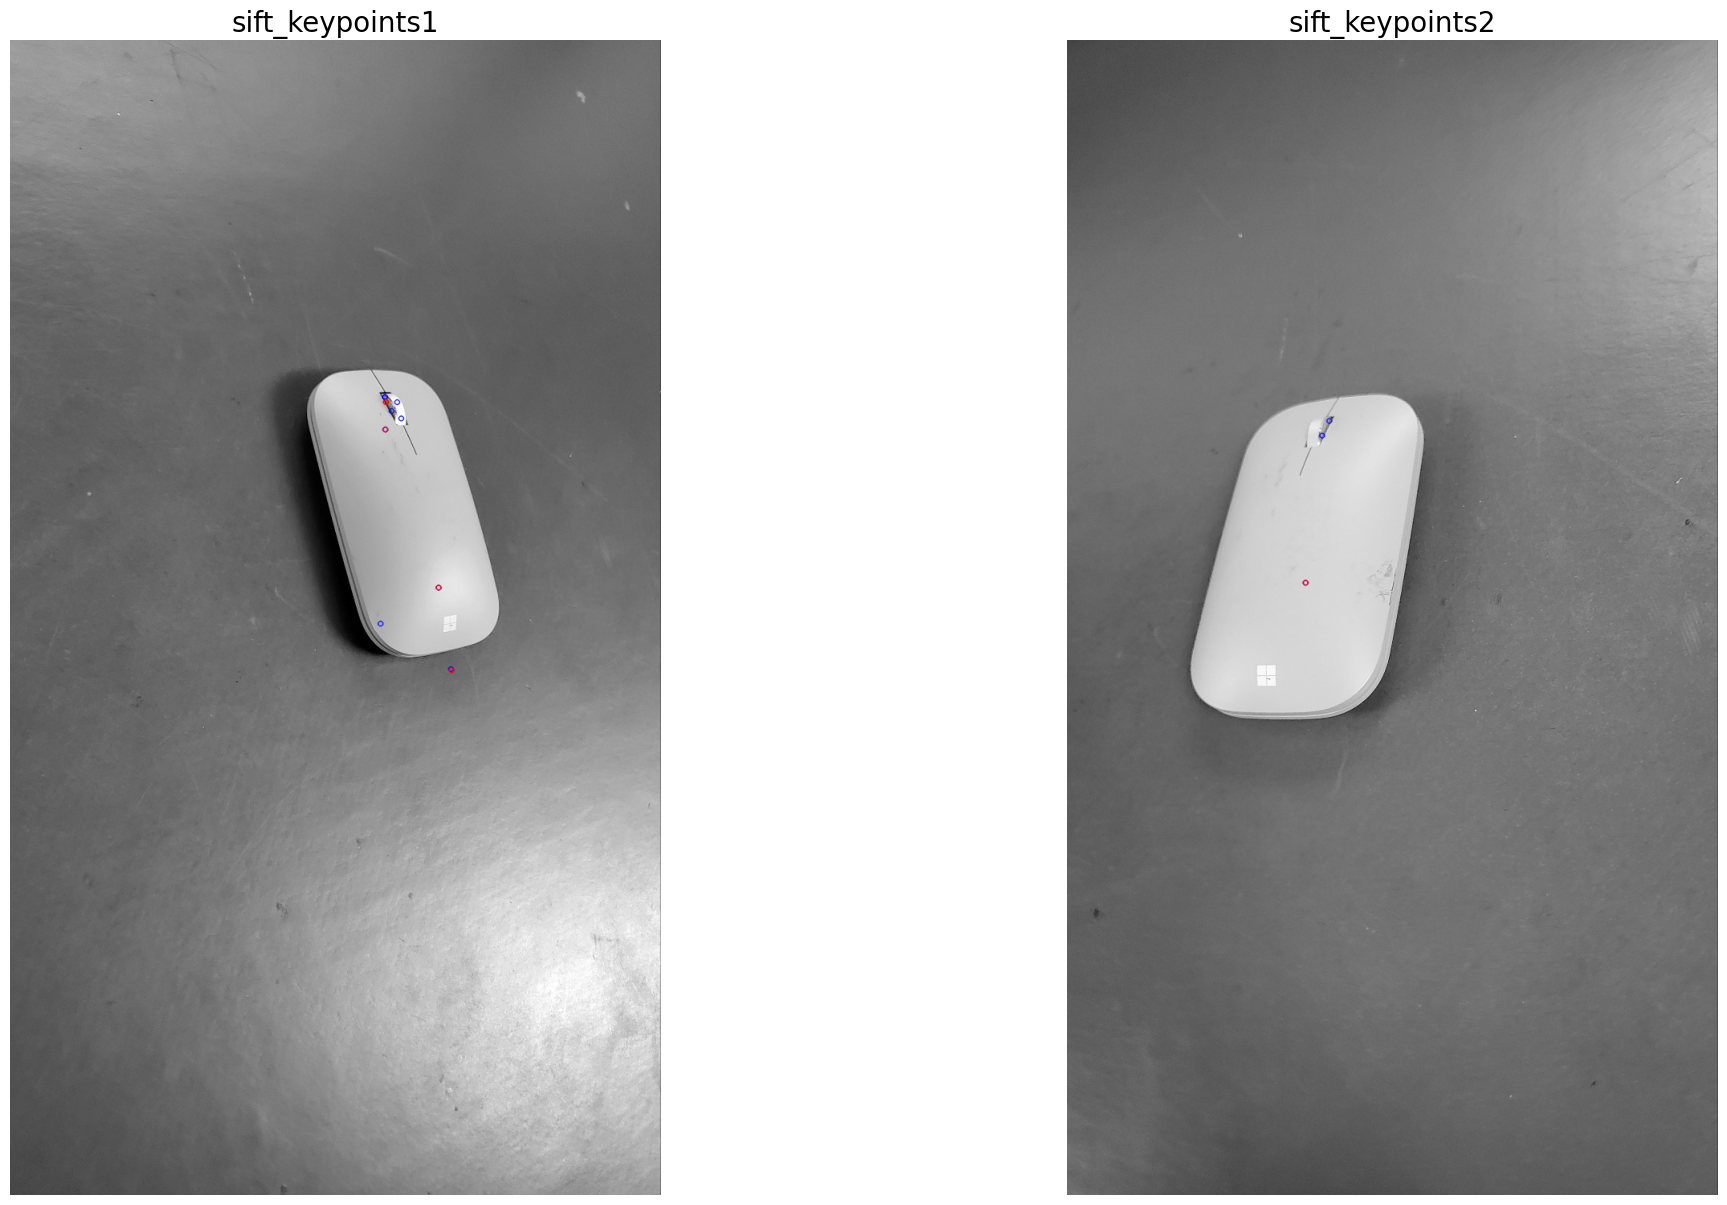

In [114]:
sift = cv2.SIFT.create()
keypoints1_4, descriptors1_4 = sift.detectAndCompute(GaussPyramids1[1], None)
keypoints1_8, descriptors1_8 = sift.detectAndCompute(GaussPyramids1[2], None)
keypoints1 = keypoints1_4 + keypoints1_8
descriptors1 =np.vstack((descriptors1_4, descriptors1_8))
sift_image1 = cv2.drawKeypoints(gray_first_image, keypoints1_4, None, color=(0,0,255))
sift_image1 = cv2.drawKeypoints(sift_image1, keypoints1_8, None,color = 255)

keypoints2_4, descriptors2_4 = sift.detectAndCompute(GaussPyramids2[1], None)
keypoints2_8, descriptors2_8 = sift.detectAndCompute(GaussPyramids2[2], None)
keypoints2 = keypoints2_4 + keypoints2_8
descriptors2 =np.vstack((descriptors2_4, descriptors2_8))
sift_image2 = cv2.drawKeypoints(gray_second_image, keypoints2_4, None, color=(0,0,255))
sift_image2 = cv2.drawKeypoints(sift_image2, keypoints2_8, None,color = 255)

plt.figure(figsize=(25,15))
plt.subplot(121), plt.imshow(sift_image1)
plt.title("sift_keypoints1",fontsize=20), plt.axis("off")
plt.subplot(122), plt.imshow(sift_image2)
plt.title("sift_keypoints2",fontsize=20), plt.axis("off")
plt.show()


### 5. SIFT Feature Matching

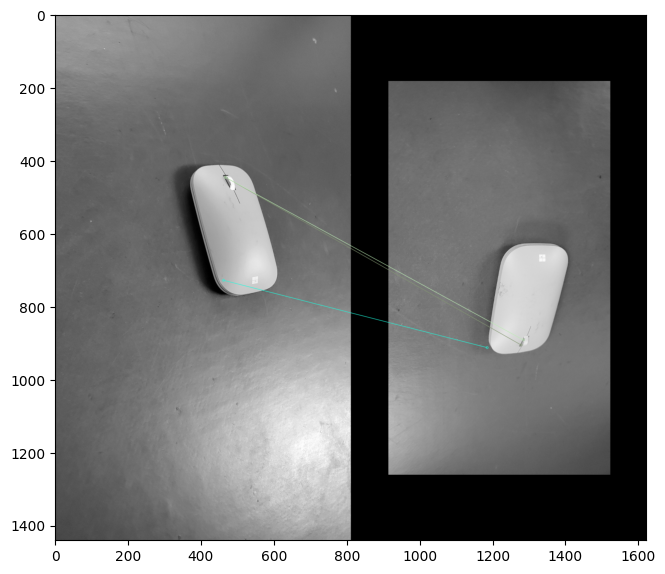

In [115]:
(h, w) = gray_second_image.shape[:2]
center = (w/2,h/2)
angle = 180
scale = 0.75
M = cv2.getRotationMatrix2D(center, angle, scale)
rimage2_4 = cv2.warpAffine(GaussPyramids2[1], M, (w, h))
rimage2_8 = cv2.warpAffine(GaussPyramids2[2], M, (w, h))
rimage2 = cv2.warpAffine(gray_second_image, M, (w, h))


keypoints2_4, descriptors2_4 = sift.detectAndCompute(rimage2_4, None)
keypoints2_8, descriptors2_8 = sift.detectAndCompute(rimage2_8, None)
keypoints2 = keypoints2_4 + keypoints2_8
descriptors2 =np.vstack((descriptors2_4, descriptors2_8))

bf = cv2.BFMatcher()
matches = bf.knnMatch(descriptors1,descriptors2, k=2)
good = []
for m,n in matches:
    if m.distance < 0.85*n.distance:
        good.append([m])
match_image = cv2.drawMatchesKnn(gray_first_image, keypoints1, rimage2, keypoints2, good, None, flags=2)
fig=plt.figure(figsize=(25,15))
ax=fig.add_subplot(2,1,1)
ax.imshow(match_image)
plt.show()

### 6. Face Image Data Acquistion

In [116]:
import os

In [117]:
path2 = "C:/Users/chlpp/OneDrive - McGill University/Desktop/ECSE 415/Assignment2/celeb_faces/"

In [118]:
from numpy.core.memmap import dtype


os.chdir(path2)
file_names=os.listdir()  #labels of the face images
gray_images=[]
gray_images_1D=[]
for file in file_names:
    img = cv2.imread(path2+file)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_images.append(gray_img)

gray_images = np.array(gray_images) # Training image datasets

test = cv2.imread(path+"test_face.jpg")
test_gray = cv2.cvtColor((test),cv2.COLOR_BGR2GRAY) #test image


### 7. Find Eigenvectors

In [119]:
image_shape = gray_images[0].shape
num_images = len(gray_images)
gray_images_1D = np.zeros((num_images,image_shape[0]*image_shape[1]), dtype=np.float32)
for i in range(num_images):
    img = gray_images[i].flatten()
    gray_images_1D[i,:] = img

mean, eigVec, eigVal = cv2.PCACompute2(gray_images_1D,mean=None)
avg_faceImage = mean.reshape(image_shape)



the first five eigenvalues 
 [[72369312.]
 [15747983.]
 [11852863.]
 [ 8447186.]
 [ 7063750.]]


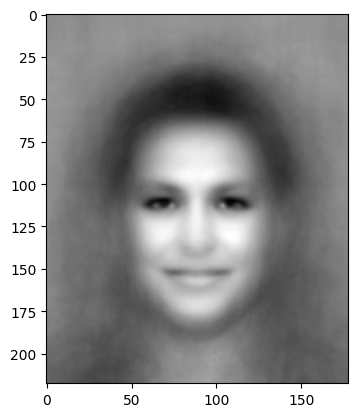

In [120]:
plt.imshow(avg_faceImage,cmap='gray')
print(f"the first five eigenvalues \n {eigVal[:5]}")

### 8. Face Detection

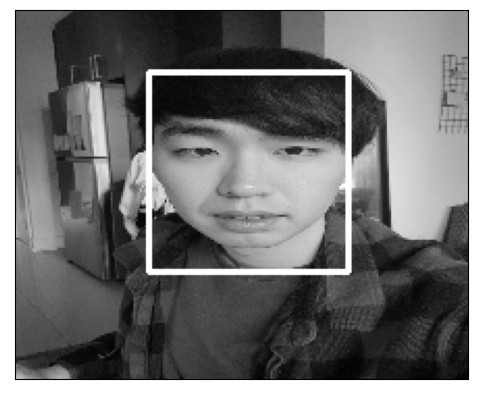

In [125]:
face_cascade = cv2.CascadeClassifier(path+'haarcascade_frontalface_default.xml')

img = np.array(test_gray, copy=True)
img = cv2.resize(img,dsize=(218,178))
faces = face_cascade.detectMultiScale(img, 1.1, 4)

for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    patch = img[y:y+h,x:x+w]
plt.imshow(img, cmap="gray")
plt.xticks(())
plt.yticks(())
plt.show()

### 9. Face Recognition

000102.jpg


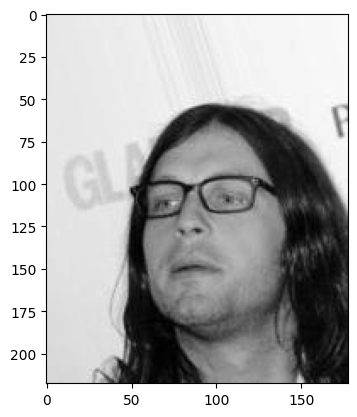

In [134]:
diff =[]

for img in gray_images:
    faces_train = face_cascade.detectMultiScale(img, 1.1, 4)
    for (x,y,w,h) in faces_train:
        face = img[y:y+h,x:x+w]
    face = cv2.resize(face,dsize=(96,96))
    error = patch - face
    error = abs(error).sum()
    diff.append(error)
i = np.argmin(diff)
print(file_names[i])
plt.imshow(gray_images[i],cmap='gray')
